## Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Для анализа предоставлены данные до 2016 года.

## Цель проекта
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных
В таблице присутствуют следующие столбцы: 
* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats as st

In [2]:
data=pd.read_csv("E:\\games.csv")
#первые строки данной таблицы
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#общая информация о значениях таблицы
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


###  Вывод об исходных данных
При изучении данных из файлов были обнаружены следующие проблемы:
* Пропуски в столбце Name-заменить невозможно, поэтому данные стоит удалить(составляют менее 5% выборки).
* Пропуски в столбце Year_of_Release-заменить невозможно, поэтому данные стоит удалить(составляют менее 5% выборки).
* Пропуски в столбце Genre-заменить невозможно, поэтому данные стоит удалить(составляют менее 5% выборки).
* Пропуски в столбце Critic_Score невозможно заменить без искажения статистики, поэтому оставим пропуски.
* Пропуски в столбце User_Score невозможно заменить без искажения статистики, поэтому оставим пропуски.
* Пропуски в столбце Rating, где год меньше 1994(год основания рейтинга) заменим на значение Unknown, остальные значения  без возрастного ограничения заменим на значения "undefined".
* Названия столбцов следует заменить, приведя к нижнему регистру.
* Столбец Year_of_Release имеет тип данных float64, его следует заменить на int для категоризации данных(замена на тип данных даты и времени неуместна, так как в дальнейшем исследовании значения будут сравниваться для категоризации данных "актуального периода").
* Столбец User_Score имеет тип данных object, который нужно привести в тип float64.

## Предобработка данных


In [5]:
#приведение к нижнему регистру названия столбцов
data.columns=data.columns.str.lower()

In [6]:
#удаление пропущенных значений в столбцах name, year_of_release, genre
data.dropna(subset=['name','year_of_release','genre'],inplace=True)

In [7]:
#замена типа данных в столбце year_of_release на целое(int)
data['year_of_release']=data['year_of_release'].astype('int')

In [8]:
#нахождение уникальных значений столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<font size="2"><b>В столбце user_score были обнаружены значения "tbd". To Be Determined, то есть "Будет определено". Значит, что пользователи еще не определились с оценкой, поэтому эти значения можно заменить на значение nan, так как если заменять средним по группам, то будет искажение статистики и дальнейших выводов.</b></font>

In [9]:
#замена значений "tbd" на пропущенные значения
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan

#преобразование типа данных столбца user_score в float64
data['user_score']=data['user_score'].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [10]:
#замена значений в тех годах, когда рейтинга ESRB не существовало на значение "Unknown"
data.loc[data['year_of_release']<1994,'rating']='Unknown'

#замена пропусков в столбце rating на значение undefined для игр без возрастных ограничений
data['rating']=data['rating'].fillna("undefined")

In [11]:
#проверка на пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Вывод о проделанной предобработке данных
* Названия столбцов приведены к нижнему регистру. 
* Удалены пропущенные значения в столбцах name, year_of_release, genre.
* Тип данных в столбце year_of_release заменен на целый(int).
* В столбце user_score, все значения равные "tbd" были заменены на пропуски(nan).
* Произведена замена в столбце rating: для игр, выпущенных до 1994-на значение "Unknown";  для остальных игр пропуски были заменены на значение "undefined"(игры без возрастных ограничений).
* Столбец user_score преобразован  в тип  float64


## Расчёты и добавление результатов в таблицу

In [12]:
#добавление столбца со значением  суммарных продаж во всех регионах
data['all_regions_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


### Вывод
* Посчитан и добавлен столбец all_regions_sales со значением суммарных продаж во всех регионах.

## Исследовательский анализ данных

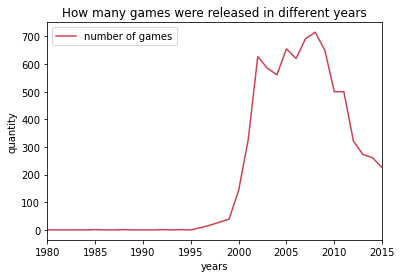

In [13]:
#сколько игр выпускалось в разные годы
m=data.pivot_table(index='year_of_release',aggfunc='count',values='critic_score')
plt.plot(m['critic_score'],color='#cb4154',label='number of games')
plt.xlim(1980,2015)
plt.title("How many games were released in different years")
plt.xlabel('years')
plt.ylabel('quantity')
plt.legend()

### Сколько игр выпускалось в разные годы. Вывод
* Из данного графика видно, что наибольшее количество выпущенных игр приходится на 2009-2011 года, резкий рост начинается с 2005 года, так как индустрия начала быстрое развитие после усовершенствования технологий. Поэтому данные за 1980-2004 год являются не релевантными для дальнейшего исследования.

In [14]:
#платформы с наибольшим количеством продаж
n=data.pivot_table(index='platform',aggfunc='sum',values='all_regions_sales')
n.columns=['sum sales by platforms']
n.sort_values(by='sum sales by platforms',ascending=False)

,sum sales by platforms
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89
GBA,305.27
PS4,265.79
PSP,248.77


<font size="2"><b>Лидерами продаж являются такие платформы, как: PS2,X360,Wii,PS3,PS. Для построения распределения по годам возьмем данные платформы.</b></font>

Text(0.5, 0, 'years')

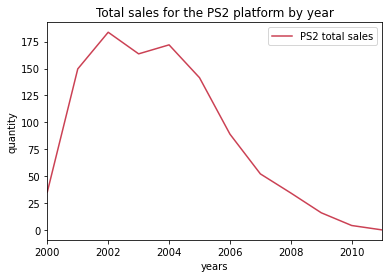

In [15]:
#распределение по суммарным продажам для платформы PS2
ps2=data.query('platform=="PS2"')
ps2_pivot=ps2.pivot_table(index='year_of_release',aggfunc='sum',values='all_regions_sales')
plt.plot(ps2_pivot['all_regions_sales'],color='#cb4154',label='PS2 total sales')
plt.xlim(2000,2011)
plt.legend()
plt.title('Total sales for the PS2 platform by year')
plt.ylabel('quantity')
plt.xlabel('years')

<font size="2"><b>Из данного графика видно, что начиная с года введения на рынок(2000 год) до пика продаж(2002 год) прошло 2 года, а также спад продаж начался в 2005 году. Исходя из графика  следует вывод что жизненный цикл для игр платформы PS2 длился 10 лет(2000-2010 год).</b></font>

Text(0.5, 0, 'years')

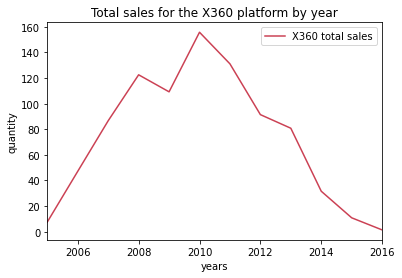

In [16]:
#распределение по суммарным продажам для платформы X360
x360=data.query('platform=="X360"')
x360_pivot=x360.pivot_table(index='year_of_release',aggfunc='sum',values='all_regions_sales')
plt.plot(x360_pivot['all_regions_sales'],color='#cb4154',label='X360 total sales')
plt.xlim(2005,2016)
plt.legend()
plt.title('Total sales for the X360 platform by year')
plt.ylabel('quantity')
plt.xlabel('years')

<font size="2"><b>Из данного графика видно, что начиная с года введения на рынок(~2005 год) до пика продаж(2008-2010 год) прошло 3-5 лет, а также спад продаж начался в 2012 году. Исходя из графика  следует вывод что жизненный цикл для игр платформы X360 длился 10 лет(2006-2016 год).</b></font>

Text(0.5, 0, 'years')

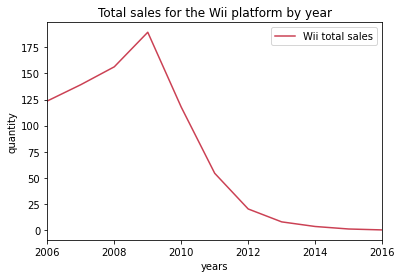

In [17]:
#распределение по суммарным продажам для платформы Wii
Wii=data.query('platform=="Wii"')
Wii_pivot=Wii.pivot_table(index='year_of_release',aggfunc='sum',values='all_regions_sales')
plt.plot(Wii_pivot['all_regions_sales'],color='#cb4154',label='Wii total sales')
plt.xlim(2006,2016)
plt.legend()
plt.title('Total sales for the Wii platform by year')
plt.ylabel('quantity')
plt.xlabel('years')

<font size="2"><b>Из данного графика видно, что начиная с года введения на рынок(2006 год) до пика продаж(2009 год) прошло 3 года, а также спад продаж начался в 2010 году. Исходя из графика  следует вывод что жизненный цикл для игр платформы Wii длился 10 лет(2006-2016 год).</b></font>

Text(0.5, 0, 'years')

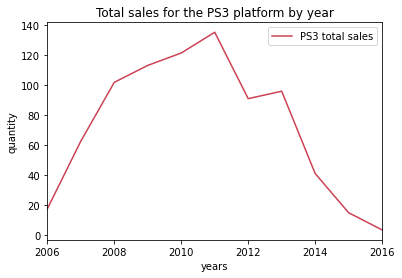

In [18]:
#распределение по суммарным продажам для платформы PS3
PS3=data.query('platform=="PS3"')
PS3_pivot=PS3.pivot_table(index='year_of_release',aggfunc='sum',values='all_regions_sales')
plt.plot(PS3_pivot['all_regions_sales'],color='#cb4154',label='PS3 total sales')
plt.xlim(2006,2016)
plt.legend()
plt.title('Total sales for the PS3 platform by year')
plt.ylabel('quantity')
plt.xlabel('years')

<font size="2"><b>Из данного графика видно, что начиная с года введения на рынок(2006 год) до пика продаж(2011 год) прошло 4 года, а также спад продаж начался в 2013 году. Исходя из графика  следует вывод что жизненный цикл для игр  платформы PS2 длился 10 лет(2010-2016 год).</b></font>

### Вывод о продолжительности жизни игр на платформах
* Исходя из вышепредставленных графиков можно сделать вывод, что с момента введения платформы на рынок до ее пика продаж проходит в среднем 3.5 года(это может быть связвно с тем, что за это время разработчики игр подстраиваются под новую платформу и выпускают новые игры на новых для рынка платформах). Средний жизненный цикл игр на платформах составляет 10 лет.

(2000.0, 2016.0)

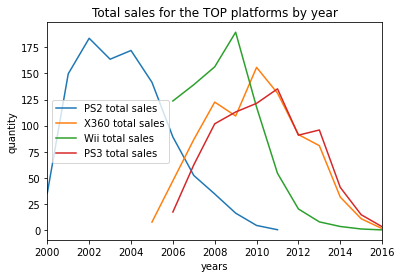

In [19]:
#общий график для топовых платформ для определения актуального периода
plt.plot(ps2_pivot['all_regions_sales'],label='PS2 total sales')
plt.plot(x360_pivot['all_regions_sales'],label='X360 total sales')
plt.plot(Wii_pivot['all_regions_sales'],label='Wii total sales')
plt.plot(PS3_pivot['all_regions_sales'],label='PS3 total sales')
plt.legend()
plt.title('Total sales for the TOP platforms by year')
plt.ylabel('quantity')
plt.xlabel('years')
plt.xlim(2000,2016)

### Вывод об актуальном периоде
Исходя из данного графика видно, что самые новые платформы такие, как PS3,X360 начинают терять продажи начиная с 2012 года,Wii(начиная с 2011 года), значит происходит период смены тренда и это наилучшее время для выведения на рынок новых(инновационных) платформ.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно определила продолжительность жизни
</div>

<font size="5"><b>Исходя из прошлых выводов "актуальным периодом" является период с 2011-2016 года.</b></font>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Нужно уменьшить актуальный период.

Если мы будем рассматривать данные с 2005 по 2016 гг, то захватим период смены тренда на рынке видеоигр, плюс мы видим по графикам выше, что многие платформы за это время успели потерять свою популярность.

Подумай, пожалуйста, о жизненном цикле продукта и годе выхода последнего поколения игровых платформ. Будет здорово, если в актуальный период не попадут старые тренды, которые могут негативно повлиять на наши рекомендации.
</div>



In [20]:
#новая таблица со значениями 2011-2016 год
data_new=data.query('year_of_release>2010')

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Ты права, данных с 2011 года будет достаточно для прогноза на 2017

</div>

In [21]:
#суммарные продажи по годам (2011-2016 год)
sales=data_new.pivot_table(index='platform',aggfunc='sum',values='all_regions_sales')
sales.columns=['total sales by platforms']
sales.sort_values(by='total sales by platforms',ascending=False)

,total sales by platforms
platform,
PS3,380.75
X360,347.25
PS4,265.79
3DS,244.54
XOne,145.05
Wii,87.13
PC,86.58
WiiU,76.24
PSV,47.38


### Вывод по суммарным продажам за актуальный  период (2011-2016) .

* Из данной таблицы видно, что лидерами продаж являются такие платформы, как PS3,X360,PS4,3DS.
* По сравнению с первичной таблицой количество платформ  уменьшилось в ~3 раза c 31 до 12 платформ.Это может быть связано с тем, что игры на  платформах становятся менее популярными (возможно, из-за входения на рынок Веб-приложений(игр в интернете), пиратских версий игр, Steam, мобильных приложений и игр и тд.)

       year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      2110.000000  2110.000000  2110.000000  2110.000000  2110.000000   
mean       2013.165877     0.277938     0.228701     0.080246     0.075626   
std           1.746899     0.696275     0.617076     0.278537     0.202243   
min        2011.000000     0.000000     0.000000     0.000000     0.000000   
25%        2011.000000     0.000000     0.000000     0.000000     0.000000   
50%        2013.000000     0.070000     0.040000     0.010000     0.020000   
75%        2015.000000     0.260000     0.190000     0.060000     0.060000   
max        2016.000000     9.660000     9.090000     4.390000     3.960000   

       critic_score   user_score  all_regions_sales  
count   1063.000000  1209.000000        2110.000000  
mean      70.371590     6.590653           0.586886  
std       13.611444     1.533026           1.345231  
min       13.000000     0.200000           0.010000  
25%       62.000000     5.8

Text(0, 0.5, 'Total sales')

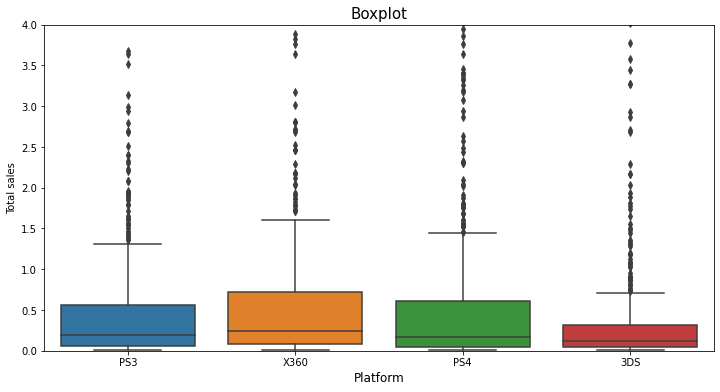

In [22]:
#диаграмма размаха по глобальным продажам игр в разбивке по самым прибыльным платформам

#список самых прибыльных платформ
list=['PS3','X360','PS4','3DS']

best_platforms=data_new.query('platform in @list')
print(best_platforms.describe())
plt.figure(figsize=(12,6))
sns.boxplot(data=best_platforms, x='platform', y='all_regions_sales')
plt.ylim(0,4)
plt.title('Boxplot', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total sales')

### Вывод по глобальным продажам игр в разбивке по платформам
* Исходя из данного графика видно, что самый большой разброс в продажах у платформы X360,PS4,PS3-это значит, что были как прибыльные игры, так и наоборот. Hо исходя из графика видно, что медианное значение выше у платформы X360. 
* Выбросами нельзя считать данные выше 75 квартиля, так как наша величина-прибыль от продаваемых игр по плафтормам, поэтому одна игра может быть сверхпопулярной, или вовсе не быть признанной пользователями("нормальных" значений нет).

<font size="2"><b>Для анализа корреляции между отзывами и продажами возьмем наиболее прибыльную платформу: PS3.</b></font>

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_regions_sales
year_of_release,1.000000,-0.146112,-0.068137,0.050052,-0.085786,-0.001309,-0.125317,-0.101213
na_sales,-0.146112,1.000000,0.813041,0.344322,0.872154,0.454413,0.137699,0.944445
eu_sales,-0.068137,0.813041,1.000000,0.374296,0.974571,0.382536,0.087823,0.949536
jp_sales,0.050052,0.344322,0.374296,1.000000,0.378520,0.202937,0.171022,0.471253
other_sales,-0.085786,0.872154,0.974571,0.378520,1.000000,0.394883,0.111490,0.966462
critic_score,-0.001309,0.454413,0.382536,0.202937,0.394883,1.000000,0.631154,0.437754
user_score,-0.125317,0.137699,0.087823,0.171022,0.111490,0.631154,1.000000,0.131029
all_regions_sales,-0.101213,0.944445,0.949536,0.471253,0.966462,0.437754,0.131029,1.000000


<AxesSubplot:>

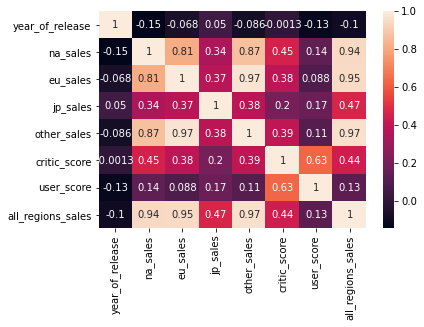

In [23]:
#корелляция между переменными для платформы PS3
display(PS3.corr())
sns.heatmap(PS3.corr(),annot=True)

<AxesSubplot:title={'center':'Scatter plot for total sales and critic scores'}, xlabel='all_regions_sales', ylabel='critic_score'>

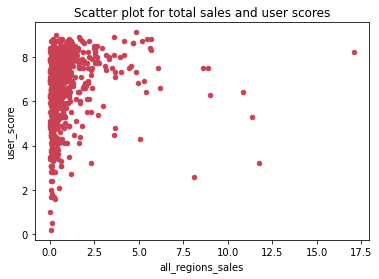

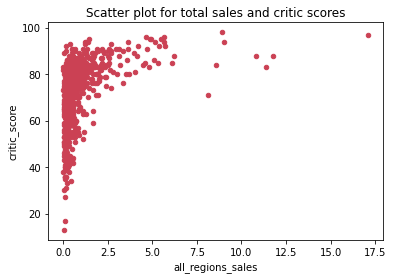

In [24]:
#диаграмма рассеяния для значений общих продаж и рейтинга пользователей
PS3.plot(kind='scatter',x='all_regions_sales',y='user_score',color='#cb4154',title='Scatter plot for total sales and user scores')

#диаграмма рассеяния для значений общих продаж и рейтинга критиков
PS3.plot(kind='scatter',x='all_regions_sales',y='critic_score',color='#cb4154',title='Scatter plot for total sales and critic scores')

### Вывод о корреляции между рейтингом и суммарной продажей
* Корреляция между продажами и рейтингом является положительной. Значение корреляции для рейтинга пользователей и продажами равна 0.13, это показывает, что зависимость не сильная и не всегда при наличии высоких отзывов от пользователей можно ожидать высокие продажи. 
* Значение корреляции для рейтинга от критиков и продажами равна 0.43, зависимость средняя по силе. А значит, что при планировании будущих продаж большее внимание стоит обращать на мнение критиков. 

In [25]:
#значение суммарных продаж по жанрам
data_new.pivot_table(index='genre',values='all_regions_sales',aggfunc='sum').sort_values(by='all_regions_sales',ascending=False)

,all_regions_sales
genre,
Action,493.66
Shooter,354.37
Role-Playing,225.95
Sports,208.27
Misc,127.01
Platform,80.48
Racing,78.20
Fighting,60.25
Simulation,46.73


<font size="2"><b>Исходя из данной таблицы самые крупные продажи имеют жанры  экшен, шутеры, а также ролевые игры. Самым неприбыльным является жанр "пазлы", его суммарная продажа по всем регионам в 53 раз меньше лидера по продажам.
    
   Так как разница между самым прибыльным жанром и неприбыльным очень большая, нужно посмотреть количество игр по каждому жанру.</b></font>

In [26]:
#количество игр в каждом жанре
data_new.pivot_table(index='genre',values='all_regions_sales',aggfunc='count').sort_values(by='all_regions_sales',ascending=False)

,all_regions_sales
genre,
Action,1269
Role-Playing,465
Adventure,410
Sports,389
Misc,375
Shooter,329
Racing,180
Fighting,159
Simulation,136


<font size="2"><b>  Количество игр существенно разнится, поэтому нужно взять медианное значение по каждому жанру для выявления самого прибыльного.</b></font>

In [27]:
data_new.pivot_table(index='genre',values='all_regions_sales',aggfunc='median').sort_values(by='all_regions_sales',ascending=False)

,all_regions_sales
genre,
Shooter,0.360
Sports,0.190
Platform,0.170
Fighting,0.150
Role-Playing,0.140
Racing,0.135
Action,0.120
Misc,0.120
Simulation,0.100


### Вывод о самых прибыльных жанрах за актуальный период
* Самыми прибыльными жанрами являются шутеры, спортивные игры, платформеры.
* Самыми непризнанным(неприбыльными) являются пазлы и приключения.


## Портрет пользователя для каждого региона

In [28]:
#самые прибыльные платформы в Северной Америке
data_new.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)


,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65
Wii,48.56
WiiU,38.10
PC,29.88
DS,18.86


<font size="2"><b>Самыми прибыльными платформами в Северной Америке являются: X360,PS3,PS4,XOne(игровые приставки);. Заметим, что доля Северной Америки является наибольшей для самых прибыльных игровых приставок на рынке, поэтому при выведении игр для приставок на рынок большее внимание стоит обращать именно на потребности этого региона.</b></font>

In [29]:
#самые прибыльные платформы в Европе
data_new.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70
XOne,51.59
Wii,29.60
WiiU,25.13
PSV,13.07


<font size="2"><b>Самыми прибыльными платформами в Европе являются PS3,PS4,X360(игровые приставки);3DS(портативная игровая консоль).</b></font>

In [30]:
#самые прибыльные(популярные) платформы в Японии
data_new.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96
WiiU,13.01
Wii,8.97
DS,8.04
X360,3.35


<font size="2"><b>Самыми прибыльными платформами в Японии являются 3DS,PS3, PSP,PSV. Заметим, что самыми прибыльными являются портативные игровые консоли, поэтому при введении на рынок игр предназначенных для портативных игровых консолей нужно обращать внимание на потребности этого региона.</b></font>

### Вывод о самых прибыльных платформах по регионам
* При запуске игр на игровые приставки типа PS3,X360,PS4 большее внимание стоит обращать на потребности рынка Северной Америки. 
* При запуске игр на портативные игровые консоли типа PSP,PSV,3DS большее внимание стоит обращать на потребности рынка Японии.


In [31]:
#самые популярные(прибыльные) жанры в Северной Америке
data_new.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69
Platform,38.28
Racing,31.98
Fighting,31.63
Simulation,15.37


<font size="2"><b>Самыми прибыльными жанрами в Северной Америке являются экшен,шутеры, а также спортивные игры.Самыми непризнанными жанрами являются стратегии и пазлы.</b></font>

In [32]:
#самые популярные жанры в Европе
data_new.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58
Misc,39.72
Platform,30.07
Simulation,19.72
Fighting,16.24


<font size="2"><b>Самыми популярными жанрами являются экшен,шутеры, а также спортивные игры. Самыми непризнанными жанрами являются пазлы и стратегии.Вывод аналогичен с выводом для Северной Америки.</b></font>

In [33]:
#самые популярные жанры в Японии
data_new.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13
Adventure,12.07
Shooter,11.92
Simulation,11.64
Sports,11.09


<font size="2"><b>Самыми популярными жанрами в Японии являются ролевые игры, экшен, разное, драки. Жанр шутеры не является прибыльным на данном рынке, если сравнивать с другими регионами и выводами для генеральной совокупности.</b></font>

In [34]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#самые популярные значения рейтингов в Северной Америке
data_new.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
rating,
M,308.45
E,170.17
undefined,123.69
E10+,117.72
T,109.31
EC,0.42
RP,0.00


In [35]:
#самые популярные значения рейтингов в Европе
data_new.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
rating,
M,250.26
E,141.73
undefined,116.61
T,83.16
E10+,78.00
RP,0.03
EC,0.00


In [36]:
#самые популярные значения рейтингов в Японии
data_new.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
rating,
undefined,138.21
E,36.68
T,33.39
M,26.14
E10+,11.23
EC,0.00
RP,0.00


### Вывод о самых популярных значениях рейтинга по регионам
* Самые популярные значения рейтингов для Северной Америки и Европы : M, E,undefined. E-рейтинг присваивается играм "для всех"(от 6 лет), игры не содержат насилия. M-"взрослыe" проекты, ввиду того, что позволяет затрагивать любые взрослые темы и ситуации. Undefined-игры без возрастных ограничений. Именно на игры этих рейтингов стоит концентрироваться компаниям-разработчикам, если основной целью ставить прибыль при вхождении на рынок Северной Америки и Европы.


* Самые популярные значений рейтингов для Японии: undefined,E,T. T-игры с таким рейтингом направлены на подростковую аудитория и уже могут содержать умеренное насилие.  Именно на игры этих рейтингов стоит концентрироваться компаниям-разработчикам, если основной целью ставить прибыль при вхождении на рынок Японии. Рейтинг undefined может быть присвоен новым играм, которые еще не прошли проверку рейтинга ESRB, или играм японского производства, которым рейтинг и не будет присвоен в будущем, из-за того, что они ориентированы только на Японский рынок.


* Самыми неприбыльными рейтингами для всех регионов являются EC,RP.

## Проверка гипотез

Первая гипотеза:
  * нулевая гипотеза:  Средние пользовательские рейтинги платформ Xbox One и PC равны.
  * альтернативная гипотеза:  Средние пользовательские рейтинги платформ Xbox One и PC не равны.
  
 Для данной гипотезы критический уровень статистической значимости равен 0.05.

In [37]:
# таблицы со значениями XOne и PC
XOne=data_new.query('platform=="XOne"')
PC=data_new.query('platform=="PC"')

In [38]:
#критический уровень статистической значимости
alpha=0.05
#проверка гипотезы
result1=st.ttest_ind(XOne['user_score'],PC['user_score'], nan_policy="omit")
if result1.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


In [39]:
# общая информация о данных для наглядности
XOne['user_score'].describe(),PC['user_score'].describe()

(count    182.000000
 mean       6.521429
 std        1.380941
 min        1.600000
 25%        5.800000
 50%        6.800000
 75%        7.500000
 max        9.200000
 Name: user_score, dtype: float64,
 count    307.000000
 mean       6.451792
 std        1.611303
 min        1.400000
 25%        5.550000
 50%        6.800000
 75%        7.700000
 max        9.300000
 Name: user_score, dtype: float64)

### Вывод по первой гипотезе
Средние пользовательские рейтинги платформ Xbox One и PC равны.

Вторая гипотеза:
 * нулевая гипотеза:  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.
 * альтернативная гипотеза:  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.    
 
  Для данной гипотезы критический уровень статистической значимости равен 0.05.

In [40]:
#таблицы со значениями жанра Action, Sports
action=data_new.query('genre=="Action"')
sports=data_new.query('genre=="Sports"')

In [41]:
#критический уровень статистической значимости
alpha=0.05
#проверка гипотезы
result2=st.ttest_ind(action['user_score'],sports['user_score'], nan_policy="omit")
if result2.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [42]:
# общая информация о данных для наглядности
action['user_score'].describe(),sports['user_score'].describe()

(count    664.000000
 mean       6.775904
 std        1.346060
 min        1.600000
 25%        6.100000
 50%        7.100000
 75%        7.800000
 max        9.100000
 Name: user_score, dtype: float64,
 count    246.000000
 mean       5.650813
 std        1.697795
 min        0.200000
 25%        4.400000
 50%        6.000000
 75%        6.900000
 max        8.800000
 Name: user_score, dtype: float64)

### Вывод по второй гипотезе
Средние пользовательские рейтинги жанров Action  и Sports не равны.

## Общий вывод
    Была изучена общая информация о предоставленных данных. 
    Выявлены следующие проблемы:  неверные типы данных, пропущенные значения, неверное значение переменных.
    Данные были предобработаны  при помощи функций и методов fillna(), astype(),transform() и тд. Была произведена категоризация данных методом pivot_table.
    Было посчитано и добавлено в таблицу:  суммарные продажи во всех регионах.
    Были выдвинуты и проверены две гипотезы, из которых следуют следующие выводы:Средние пользовательские рейтинги платформ Xbox One и PC равны, cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

## Вывод из цели

Исходя из предыдущих выводов были получены определяющие успешность игры закономерности:


* Самыми прибыльными жанрами являются шутеры, спортивные игры, платформеры.


* Самыми неприбыльными жанрами являются пазлы и приключения.


* Исходя из вышепредставленных графиков можно сделать вывод, что с момента введения платформы на рынок до ее пика продаж проходит в среднем 3.5 года(это может быть связвно с тем, что за это время разработчики игр подстраиваются под новую платформу и выпускают новые игры на новых для рынка платформах). Средний жизненный цикл игр на платформах составляет 10 лет.    


*  При планировании будущих продаж большее внимание стоит обращать на рейтинги критиков. 


* При запуске игр на игровые приставки типа PS3,X360,PS4 большее внимание стоит обращать на потребности рынка Северной Америки. 


* При запуске игр на портативные игровые консоли типа PSP,PSV,3DS большее внимание стоит обращать на потребности рынка Японии.

 
* Самые популярные значения рейтингов для Северной Америки и Европы : M, E,undefined. Именно на игры этих рейтингов стоит концентрироваться компаниям-разработчикам, если основной целью ставить прибыль при вхождении на рынок Северной Америки и Европы.


* Самые популярные значений рейтингов для Японии: undefined,E,T. Именно на игры этих рейтингов стоит концентрироваться компаниям-разработчикам, если основной целью ставить прибыль при вхождении на рынок Японии.Рейтинг undefined может быть присвоен новым играм, которые еще не прошли проверку рейтинга ESRB, или играм японского производства, которым рейтинг и не будет присвоен в будущем, из-за того, что они ориентированы только на Японский рынок.


* Самыми неприбыльными рейтингами для всех регионов являются EC,RP